# Notebook Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# Loading Dataset

In [2]:
data = pd.read_csv('/home/neelakash/Downloads/archive/googleplaystore.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


/home/neelakash/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


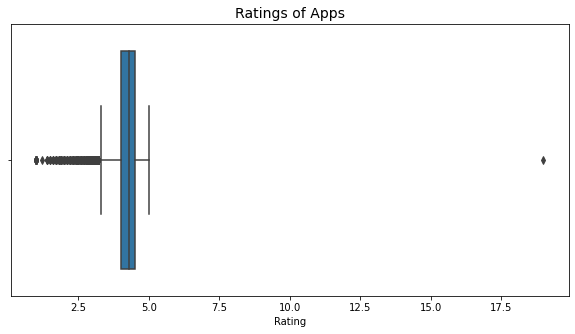

In [6]:
plt.figure(figsize=(10,5))
plt.title("Ratings of Apps", fontsize=14)
sns.boxplot(data.Rating)
plt.show()

There seems to be some outlier in the data , which can affect our final conclusions so it is better to get rid of them . 

In [7]:
# The row which has this data .
# We see there are hardly any data which is above 5.0

data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Data Cleaning 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Let's find out the number of null values .
pd.isnull(data).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
data.drop([10472], axis=0, inplace=True)

In [11]:
data.shape   #This confirms that the row has been dropped .

(10840, 13)

In [12]:
# We'll be replacing the missing values in Ratings column with it's mode value .
data['Rating'].fillna(value=stats.mode(data.Rating)[0][0], inplace=True)

In [13]:
# Replacing the missing values in Type with their mode value .
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

In [14]:
# Replacing the missing values in Current Ver with their mode value .
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

# Replacing the missing values in Current Ver with their mode value .
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)


In [15]:
# Check for any null data even after cleaning ----> cleaned successfully
pd.isnull(data).sum()    

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
# Convert datatype of reviews to numeric .
data['Reviews'] = pd.to_numeric(data['Reviews'], errors="coerce")

In [17]:
# Convert datatytpes of size, installs and Price .

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M','') if 'M' in x else str(x))
data['Size'] = pd.to_numeric(data['Size'], errors="coerce")

data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in x else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))


In [18]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in x else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in x else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [19]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,8829.000000,1.084000e+04,10840.000000
mean,4.220074,4.441529e+05,22.270540,1.546434e+07,1.027368
std,0.484197,2.927761e+06,22.628691,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.400000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,31.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [20]:
data['Size'].fillna(value=np.mean(data.Size), inplace=True)

In [21]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.058402,0.044962,0.040027,-0.018421
Reviews,0.058402,1.000000,0.127706,0.643122,-0.009667
Size,0.044962,0.127706,1.000000,0.081081,-0.021778
Installs,0.040027,0.643122,0.081081,1.000000,-0.011689
Price,-0.018421,-0.009667,-0.021778,-0.011689,1.000000


In [23]:
mask = np.zeros_like(data.corr())
tri = np.triu_indices_from(mask)
mask[tri] = True

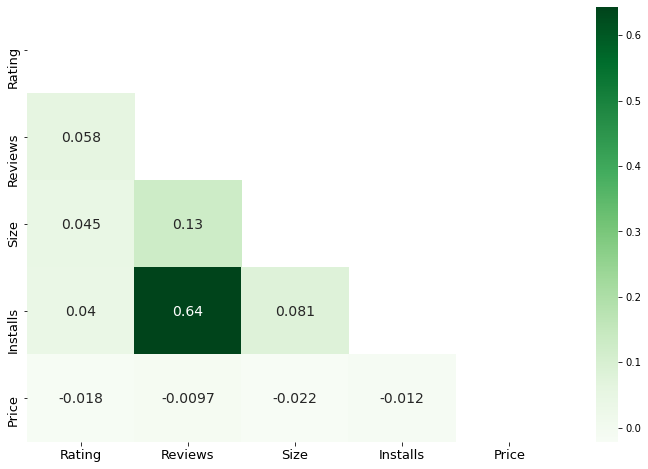

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), mask=mask, annot_kws={"size":14}, cmap='Greens', annot=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [25]:
bins = (data.Rating.max() - data.Rating.min())/len(data.Rating)  #ignore .

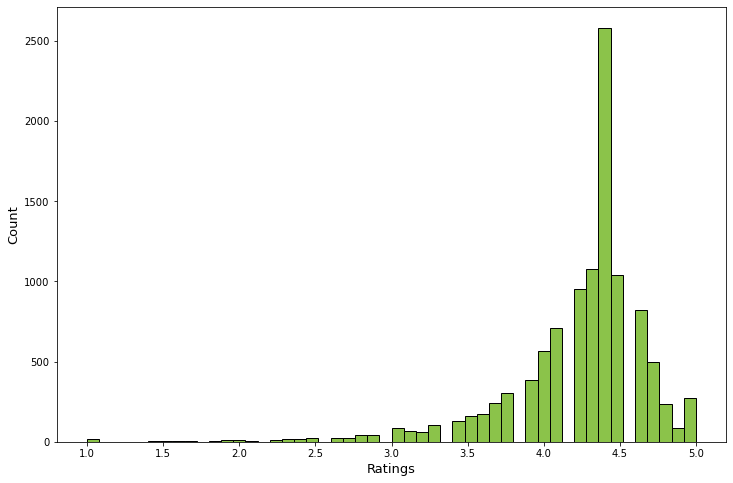

In [70]:
plt.figure(figsize=(12,8))
plt.hist(data['Rating'], color="#8BC34A", bins=50, ec="black")
plt.xlabel("Ratings", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.show()

In [27]:
lists = data.groupby('Category')

In [51]:
lists.count()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
ART_AND_DESIGN,65,65,65,65,65,65,65,65,65,65,65,65
AUTO_AND_VEHICLES,85,85,85,85,85,85,85,85,85,85,85,85
BEAUTY,53,53,53,53,53,53,53,53,53,53,53,53
BOOKS_AND_REFERENCE,231,231,231,231,231,231,231,231,231,231,231,231
BUSINESS,460,460,460,460,460,460,460,460,460,460,460,460
COMICS,60,60,60,60,60,60,60,60,60,60,60,60
COMMUNICATION,387,387,387,387,387,387,387,387,387,387,387,387
DATING,234,234,234,234,234,234,234,234,234,234,234,234
EDUCATION,156,156,156,156,156,156,156,156,156,156,156,156


In [35]:
mean_data = pd.DataFrame({"Rating Mean":lists['Rating'].mean(), "Price Mean":lists['Price'].mean(), 
                    "Review Mean":lists['Reviews'].mean(), "Installs Mean":lists['Installs'].mean()}, 
                         columns=)

In [36]:
mean_data.head()

,Rating Mean,Price Mean,Review Mean,Installs Mean
Category,,,,
ART_AND_DESIGN,4.360000,0.091846,26376.000000,1.912894e+06
AUTO_AND_VEHICLES,4.220000,0.158471,13690.188235,6.250613e+05
BEAUTY,4.303774,0.000000,7476.226415,5.131519e+05
BOOKS_AND_REFERENCE,4.358442,0.518485,95060.904762,8.318050e+06
BUSINESS,4.216522,0.402761,30335.982609,2.178076e+06


To see the relationship between category and number of installs we might get some good insights from the data . 

# Insights from data 

The relationship between ratings of various categories is not much correlated with it's price .

In [65]:
one = mean_data['Rating Mean']
two = mean_data['Price Mean']
co = one.corr(two)

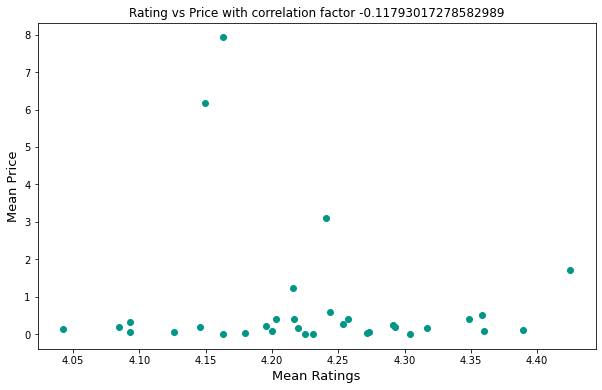

In [66]:
plt.figure(figsize=(10, 6))
plt.title(f"Rating vs Price with correlation factor {co}")
plt.scatter(mean_data['Rating Mean'], mean_data['Price Mean'], color='#009688')
plt.xlabel("Mean Ratings", fontsize=13)
plt.ylabel("Mean Price", fontsize=13)
plt.show()

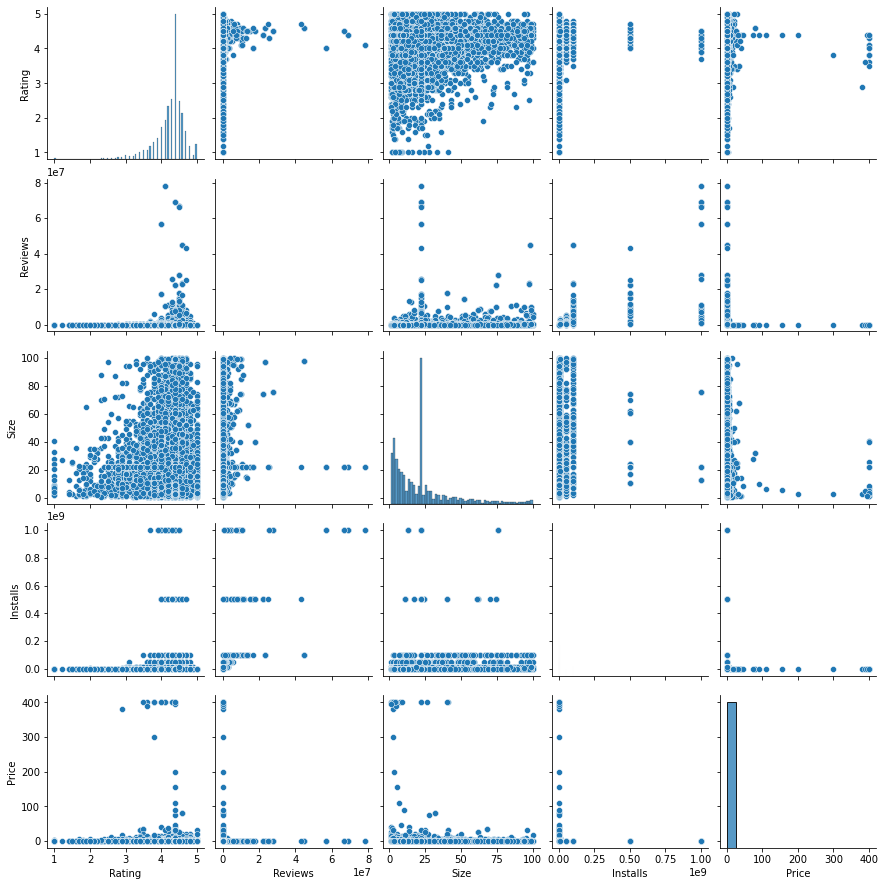

In [68]:
sns.pairplot(data)
plt.show()

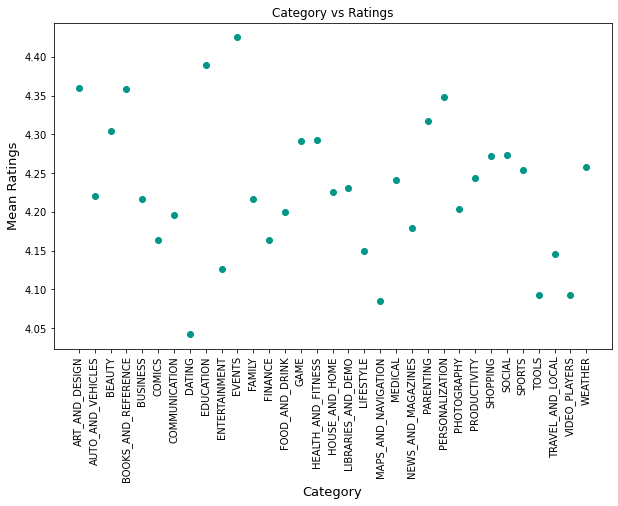

In [73]:
plt.figure(figsize=(10, 6))
plt.title("Category vs Ratings")
plt.plot(one, 'ro', color='#009688')
plt.xlabel("Category", fontsize=13)
plt.xticks(rotation=90)
plt.ylabel("Mean Ratings", fontsize=13)
plt.show()

In [74]:
rnd = mean_data['Installs Mean']

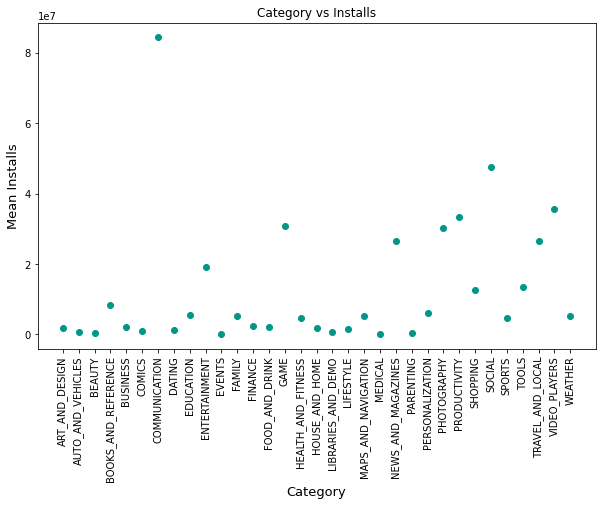

In [75]:
plt.figure(figsize=(10, 6))
plt.title("Category vs Installs")
plt.plot(rnd, 'ro', color='#009688')
plt.xlabel("Category", fontsize=13)
plt.xticks(rotation=90)
plt.ylabel("Mean Installs", fontsize=13)
plt.show()

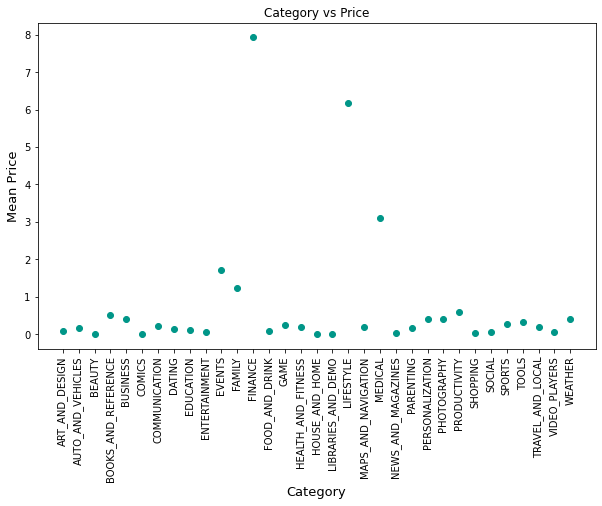

In [76]:
plt.figure(figsize=(10, 6))
plt.title("Category vs Price")
plt.plot(mean_data['Price Mean'], 'ro', color='#009688')
plt.xlabel("Category", fontsize=13)
plt.xticks(rotation=90)
plt.ylabel("Mean Price", fontsize=13)
plt.show()

# Conclusions Drawn

1) Event Apps have a very high rating although the no. of installs of such apps are less .

2) Communication Apps have a very high rate of installations but still they are almost free most of the time .

3) Finance Apps are the highest paid apps , and they have a very few installs may be due to their paid nature .

4) Suprisingly , the dating apps are the most downvoted or low rated apps and with a very few installs . 

5) Social Apps are second most liked app after communication apps .